In [1]:
import pandas as pd
import seaborn as sns

# Selezione di colonne e dati

In questa lezione, vedremo come selezionare le singole feature e determinati insiemi di dati. Iniziamo leggendo il nostro dataset di riferimento, ed impostiamo come indice la colonna `PassengerId`.

In [2]:
titanic = pd.read_csv('../dataset/train.csv')
titanic.set_index('PassengerId', inplace=True)
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Isoliamo adesso le colonne relative al *nome* ed all'*età* dei passeggeri.

In [3]:
name_age = titanic[['Name', 'Age']]
name_age.head()

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0


Possiamo anche usare l'indicizzazione mediante condizioni logiche per isolare i dati che rispondono a certe condizioni. Ad esempio, se volessimo individuare tutti i passeggeri maggiorenni:

In [4]:
over_18 = titanic[titanic['Age'] > 18]
over_18.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


Ovviamente è possibile combinare più condizioni. Ricordiamoci che, dato che stiamo comparando degli *array* di valori booleani (e non coppie di valori booleani), dovremo usare gli operatori bitwise (ovvero `&` per l'AND, `|` per l'OR, etc.).

In [5]:
over_18_female = titanic[(titanic['Age'] > 18) & (titanic['Sex'] == 'female')]
over_18_female.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Una alternativa è quella di usare la funzione `loc`, che ci permette di selezionare un insieme di dati mediante operazioni di slicing e specificare, ove occorresse, le feature da considare.

In [6]:
first_ten = titanic.loc[:10, :]
first_ten_names = first_ten.loc[:, ['Name', 'Age']]
# Possibile notazione alternativa
# first_ten_names = first_ten.loc[:, list(titanic.columns[2:5:2])]
first_ten_names

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
6,"Moran, Mr. James",NaN
7,"McCarthy, Mr. Timothy J",54.0
8,"Palsson, Master. Gosta Leonard",2.0
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0


Molto simile è la funzione `iloc`, che consente di effettuare l'indicizzazione direttamente a partire dagli indici di colonna.

In [7]:
first_ten_names_with_iloc = titanic.iloc[:10, 2:5:2]
first_ten_names_with_iloc

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
6,"Moran, Mr. James",NaN
7,"McCarthy, Mr. Timothy J",54.0
8,"Palsson, Master. Gosta Leonard",2.0
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0


# Funzioni di visualizzazione

Vediamo ora un paio di funzioni di visualizzazione dei dati, *utilizzabili senza necessariamente richiamare matplotlib*. Possiamo usarle indifferentemente su dataframe e series.

In primis, possiamo visualizzare tutti i dati presenti nel dataframe.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


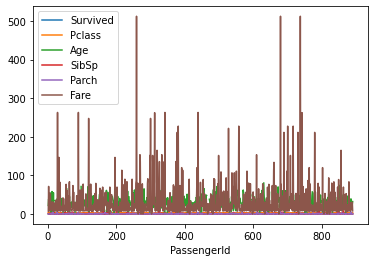

In [8]:
titanic.plot()
titanic.head()

Possiamo poi visualizzare i dati relativi ad una singola serie (o anche per estensione ad un sottoinsieme di campioni).

<AxesSubplot:xlabel='PassengerId'>

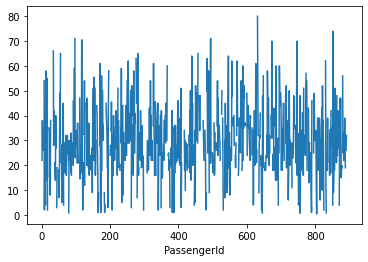

In [9]:
titanic['Age'].plot()

<AxesSubplot:xlabel='PassengerId'>

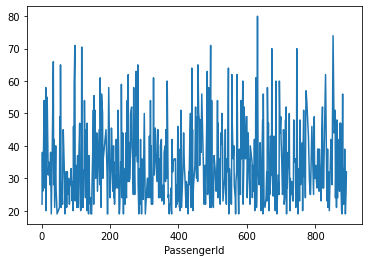

In [10]:
titanic[titanic['Age'] > 18]['Age'].plot()

Esistono anche funzioni specifiche per gli istogrammi e per lo scatter plot, ad esempio. Il vantaggio sta nel fatto che l'interfaccia è praticamente mutuata da quella usata da Matplotlib, per cui il codice richiede poche modifiche per essere adattato.

<AxesSubplot:ylabel='Frequency'>

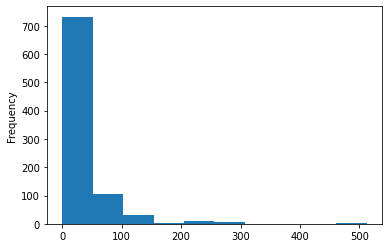

In [11]:
titanic['Fare'].plot.hist()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

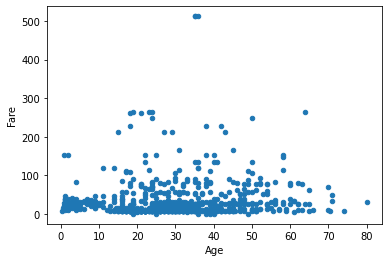

In [12]:
titanic.plot.scatter(x='Age', y='Fare')

# Altre funzioni utili

Vediamo infine alcune funzioni di interesse generale. La prima è `describe`, che permette di descrivere le proprietà statistiche a livello delle singole colonne del dataframe.

In [13]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Abbiamo poi `corr`, che ci permette di effettuare un'analisi di correlazione *senza usare (direttamente) NumPy*.

<AxesSubplot:>

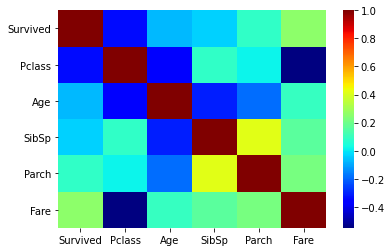

In [14]:
sns.heatmap(titanic.corr(), cmap='jet')

Possiamo poi rimuovere intere feature o dati mediante la funzione `drop`. In particolare, se vogliamo rimuovere delle feature, dobbiamo specificare il parametro `axis=1`, mentre se vogliamo rimuovere dei campioni dobbiamo specificare il valore `axis=0`. Ricordiamoci inoltre di specificare `inplace=True`.

In [15]:
titanic.drop(['Name'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In ultimo, potremmo avere dei dati nei quali, per certe feature, non sono disponibili valori adeguati. In queste situazioni, possiamo decidere se provare a "riempirli", usando la funzione `fillna`, o semplicemente scartare l'intero campione mediante la funzione `dropna`. Usiamo il secondo approccio.

In [16]:
titanic.dropna(axis=0, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
7,0,1,male,54.0,0,0,17463,51.8625,E46,S
11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,female,58.0,0,0,113783,26.5500,C103,S
